In [53]:
#Importing Libraries 
#basics and Visualization
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#ML librarie
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


#metrics
from statistics import mean
from sklearn.metrics import accuracy_score as score
from sklearn.metrics import explained_variance_score as evs
from sklearn.metrics import mean_squared_error


In [18]:
df = pd.read_csv(r'flare.data2', sep=' ', header=None)

In [28]:
df.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,5,0,3,1,3,1,1,1,1,1,0,0,0
1,2,3,2,1,3,1,1,2,1,1,0,0,0
2,1,4,2,1,3,1,1,2,1,1,0,0,0
3,5,3,3,1,2,1,1,1,1,1,0,0,0
4,5,4,3,1,1,1,1,2,1,1,0,0,0
5,1,0,2,1,2,1,1,2,1,1,0,0,0
6,0,5,2,1,3,1,1,2,1,1,0,0,0
7,1,0,2,1,3,1,1,2,1,1,0,0,0
8,1,0,2,1,2,1,1,2,1,1,1,0,0
9,0,5,2,1,3,1,1,2,1,1,0,0,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       1066 non-null   int64
 1   1       1066 non-null   int64
 2   2       1066 non-null   int64
 3   3       1066 non-null   int64
 4   4       1066 non-null   int64
 5   5       1066 non-null   int64
 6   6       1066 non-null   int64
 7   7       1066 non-null   int64
 8   8       1066 non-null   int64
 9   9       1066 non-null   int64
 10  10      1066 non-null   int64
 11  11      1066 non-null   int64
 12  12      1066 non-null   int64
dtypes: int64(13)
memory usage: 108.4 KB


In [21]:
df[0] = LabelEncoder().fit_transform(df[0].tolist())
df[1] = LabelEncoder().fit_transform(df[1].tolist())
df[2] = LabelEncoder().fit_transform(df[2].tolist())

<AxesSubplot:>

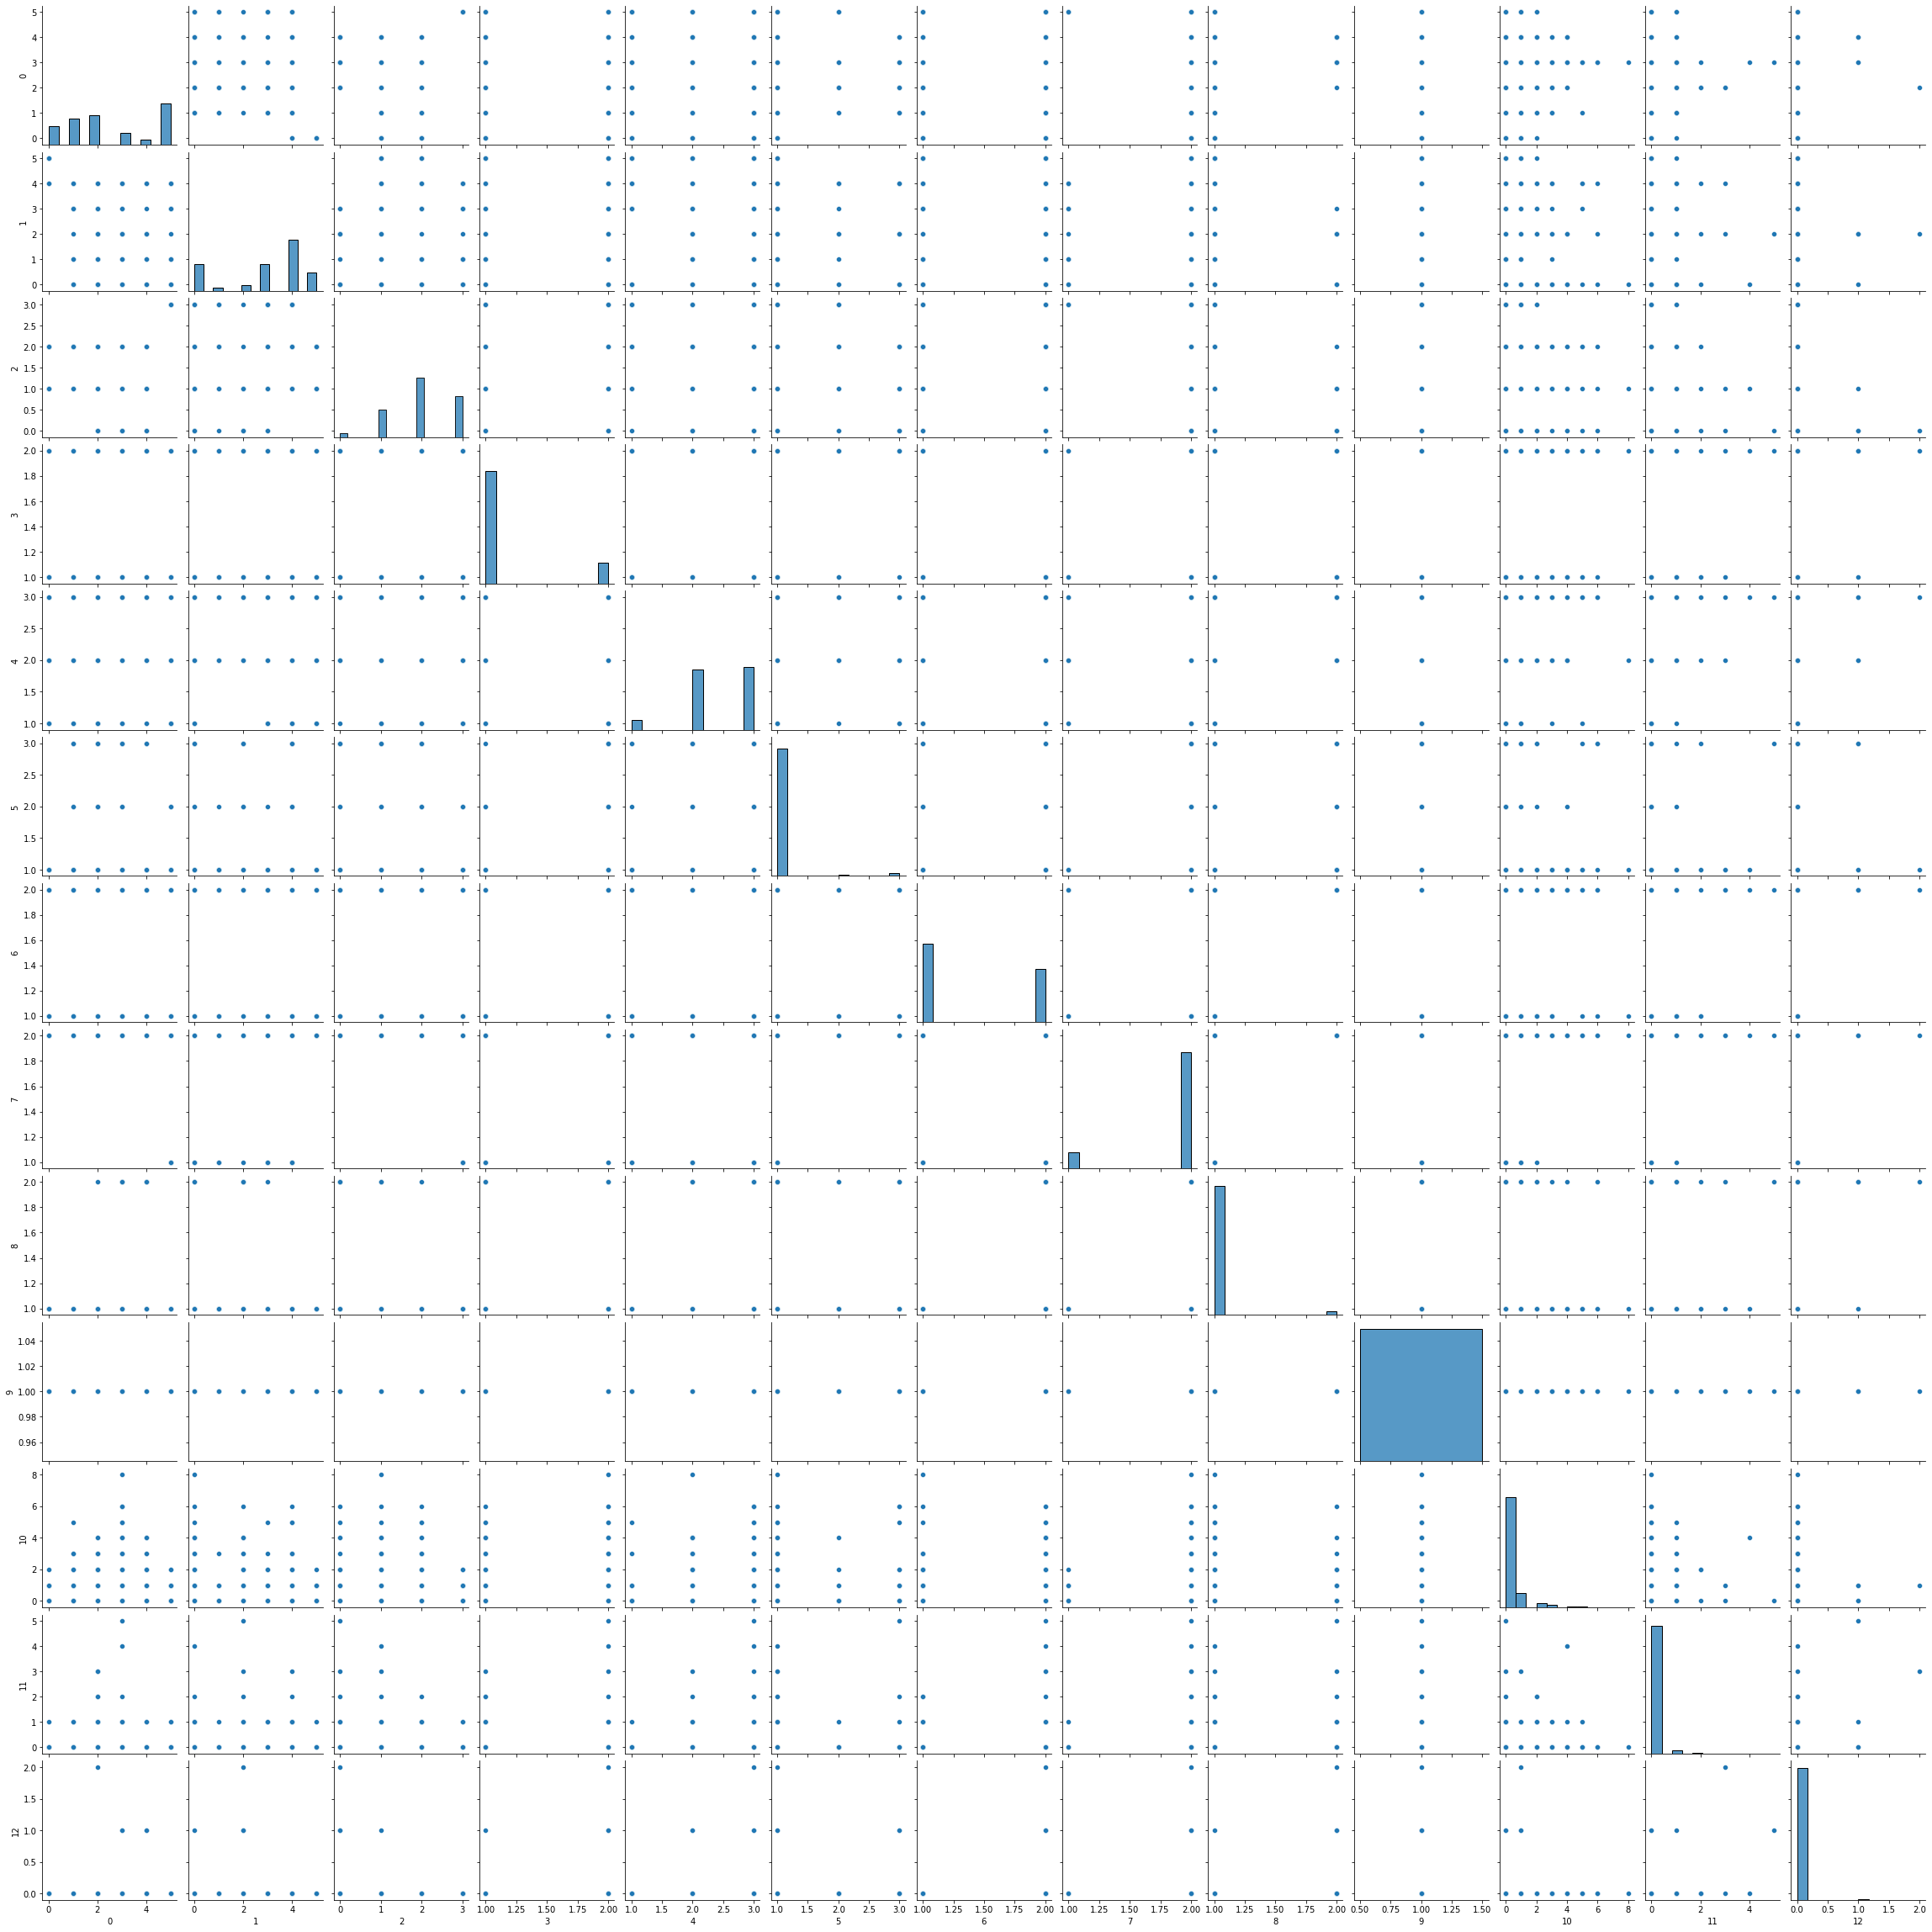

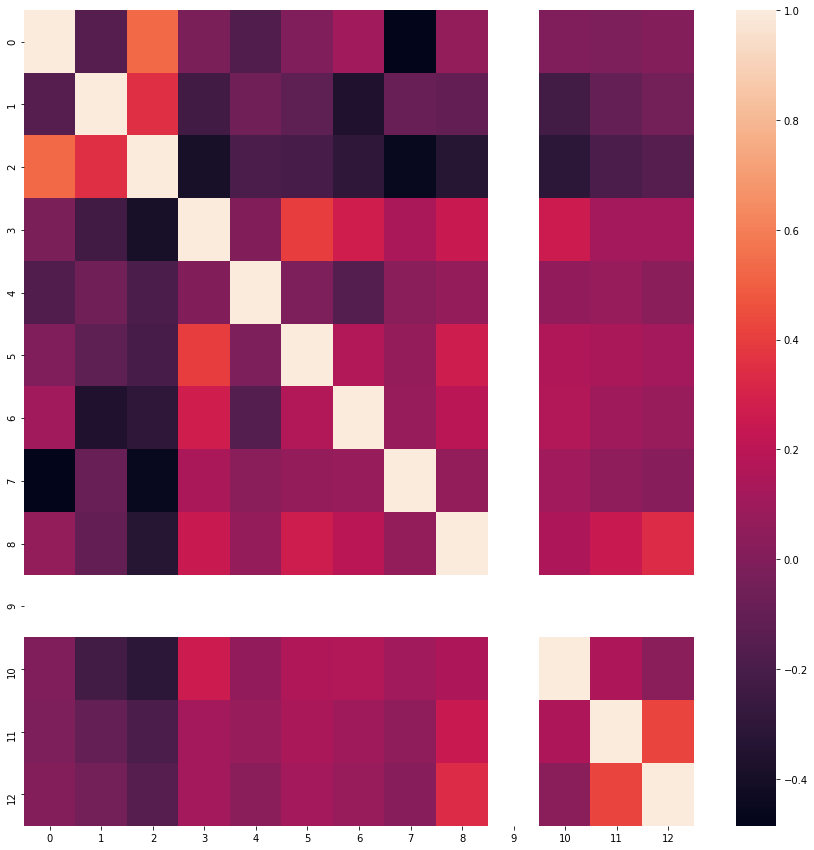

In [24]:
sns.pairplot(data=df)

#Heatmap
num_feat = df.select_dtypes(include=np.number).columns
plt.figure(figsize= (15, 15))
sns.heatmap(df.corr())

In [ ]:
# TODO
# with sns.plotting_context("notebook",font_scale=2.5):
#     g = sns.pairplot(house[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], 
#                  hue='bedrooms', palette='tab20',size=6)
# g.set(xticklabels=[]);

In [27]:
set(df[9])

{1}

Drop 9th attribute

In [48]:
y1 = df[10]
y2 = df[11]
y3 = df[12]
X = df.drop([9, 10, 11, 12], axis = 1)
X.head(10)

,0,1,2,3,4,5,6,7,8
0,5,0,3,1,3,1,1,1,1
1,2,3,2,1,3,1,1,2,1
2,1,4,2,1,3,1,1,2,1
3,5,3,3,1,2,1,1,1,1
4,5,4,3,1,1,1,1,2,1
5,1,0,2,1,2,1,1,2,1
6,0,5,2,1,3,1,1,2,1
7,1,0,2,1,3,1,1,2,1
8,1,0,2,1,2,1,1,2,1
9,0,5,2,1,3,1,1,2,1


In [ ]:
# TODO
# B. Normality and skewness
# Rescaling?
# TODO
# finaldata = pd.get_dummies(data) for 0,1,2

In [49]:
# TODO other y`s
train_X, test_X, train_y, test_y = train_test_split(X, y1, test_size = 20)

In [50]:
LR = LinearRegression(normalize=True)
LR.fit(train_X, train_y)

LinearRegression(normalize=True)

In [51]:
maxcoef = np.argsort(-np.abs(LR.coef_))
coef = LR.coef_[maxcoef]
for i in range(0, 5):
    print("{:.<025} {:< 010.4e}".format(df.columns[maxcoef[i]], coef[i]))


2........................ -3.2118e-01
3........................  2.5981e-01
0........................  7.4476e-02
7........................  5.9053e-02
8........................ -4.2241e-02


In [57]:
pred = LR.predict(test_X)
print('Accuracy in percent = ',mean_squared_error(pred, test_y))

Accuracy in percent =  1.538773654902549


In [58]:
pred = LR.predict(train_X)
print('Accuracy in percent = ',mean_squared_error(pred, train_y))

Accuracy in percent =  0.5783471729549374


In [59]:
from sklearn.model_selection import learning_curve

In [61]:
train_sizes = [1, 10, 100, 500, 700]
train_sizes, train_scores, validation_scores = learning_curve(
estimator = LinearRegression(),
X = X,
y = y1, train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

In [64]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1     -0.000000
10     0.091983
100    1.112652
500    0.700769
700    0.623287
dtype: float64

 --------------------

Mean validation scores

 1      0.787105
10     1.058952
100    1.171046
500    0.670815
700    0.650020
dtype: float64


(0.0, 1.5)

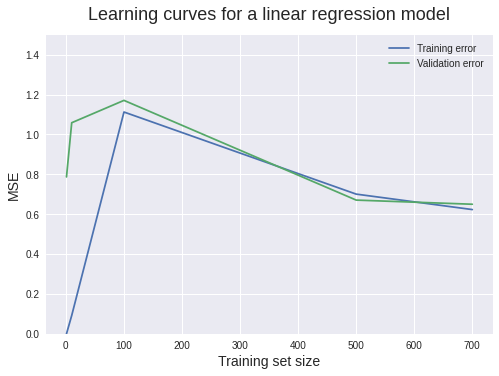

In [71]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,1.5)


In [99]:
df = pd.read_csv(r'flare.data2', sep=' ', header=None)
pd.set_option('display.max_columns', 500)
newdf = pd.get_dummies(df)
newdf.head()

,3,4,5,6,7,8,9,10,11,12,0_B,0_C,0_D,0_E,0_F,0_H,1_A,1_H,1_K,1_R,1_S,1_X,2_C,2_I,2_O,2_X
0,1,3,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1
1,1,3,1,1,2,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,3,1,1,2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,1,2,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,1,1,1,1,2,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [100]:
newdf.describe()

,3,4,5,6,7,8,9,10,11,12,0_B,0_C,0_D,0_E,0_F,0_H,1_A,1_H,1_K,1_R,1_S,1_X,2_C,2_I,2_O,2_X
count,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.0,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000
mean,1.153846,2.401501,1.059099,1.404315,1.875235,1.025328,1.0,0.300188,0.046904,0.005629,0.137899,0.197936,0.224203,0.089118,0.040338,0.310507,0.202627,0.025328,0.043152,0.204503,0.388368,0.136023,0.032833,0.209193,0.447467,0.310507
std,0.360971,0.620584,0.320324,0.490989,0.330608,0.157194,0.0,0.835784,0.302811,0.086487,0.344955,0.398631,0.417252,0.285048,0.196842,0.462918,0.402145,0.157194,0.203294,0.403527,0.487608,0.342973,0.178283,0.406924,0.497466,0.462918
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,2.000000,2.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.0,8.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [123]:
y1 = newdf[10]
y2 = newdf[11]
y3 = newdf[12]
X = newdf.drop([9, 10, 11, 12], axis = 1)
X.head()

,3,4,5,6,7,8,0_B,0_C,0_D,0_E,0_F,0_H,1_A,1_H,1_K,1_R,1_S,1_X,2_C,2_I,2_O,2_X
0,1,3,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1
1,1,3,1,1,2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,3,1,1,2,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,1,2,1,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,1,1,1,1,2,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


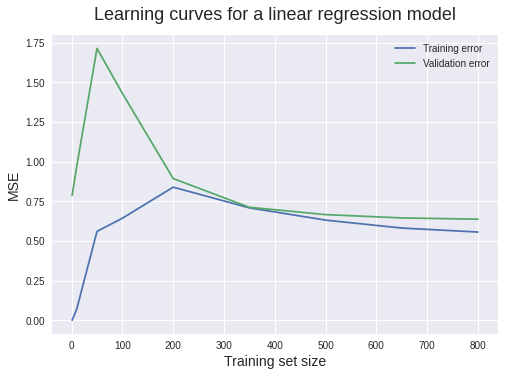

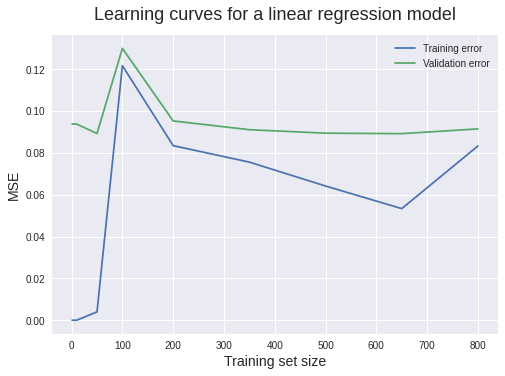

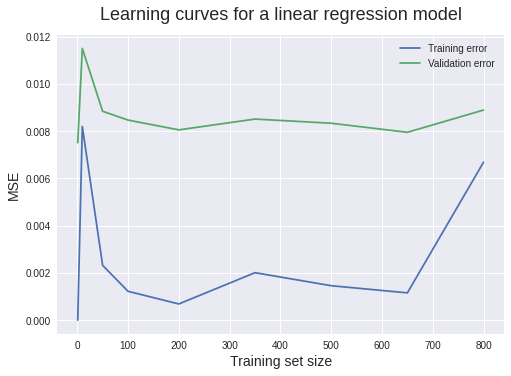

In [128]:
import matplotlib.pyplot as plt

for cur_y in [y1,y2,y3]:
    train_sizes = [1, 10, 50, 100, 200, 350 ,500, 650, 800]
    train_sizes, train_scores, validation_scores = learning_curve(
    estimator = Ridge(alpha=.5),
    X = X,
    y = cur_y, train_sizes = train_sizes, cv = 5,
    scoring = 'neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)
    # print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
    # print('\n', '-' * 20) # separator
    # print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))
    plt.style.use('seaborn')
    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
    plt.legend()
#     plt.ylim(0,2)
#     plt.plot()
    plt.show()